In [1]:
from tqdm import tqdm_notebook, tnrange
import numpy as np
from random import shuffle
import pandas as pd
import os
import random

In [2]:
#read in
tst_len = np.load("../data/test-processed/test_length_l2a_processed.npy")
tst_y = np.load("../data/test-processed/test_y_l2a_processed.npy")
tst_x = np.load("../data/test-processed/test_x_l2a_processed.npy")
tr_len = np.load("../data/train-processed/length_l2a_processed.npy")
tr_y = np.load("../data/train-processed/data_y_l2a_processed.npy")
tr_x = np.load("../data/train-processed/data_x_l2a_processed.npy")

tr_xend = tr_x[:,23,:,:,:]
tst_xend = tst_x[:,23,:,:,:]

In [ ]:
#14 has nas
np.argwhere(np.isnan(tr_xend[:,:,:,14]))

In [ ]:
test = np.delete(tr_xend[:,:,:,:], 14, axis = 3)

In [3]:
tr_xend = np.delete(tr_xend[:,:,:,:], 14, axis = 3)
tst_xend = np.delete(tst_xend[:,:,:,:], 14, axis = 3)

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.framework import ops
from sklearn import preprocessing

In [ ]:
tr_xend.shape

In [5]:
(m, n_H0, n_W0, n_C0) = tr_xend.shape

In [6]:
for a in range(0,16):
    tr_xend[:,:,:,a] = (tr_xend[:,:,:,a] - np.min(tr_xend[:,:,:,a]))/(np.max(tr_xend[:,:,:,a]) - np.min(tr_xend[:,:,:,a]))

In [7]:
for a in range(0,16):
    tst_xend[:,:,:,a] = (tst_xend[:,:,:,a] - np.min(tst_xend[:,:,:,a]))/(np.max(tst_xend[:,:,:,a]) - np.min(tst_xend[:,:,:,a]))

In [ ]:
for a in range(0,16):
    tr_xend[:,:,:,a] = (tr_xend[:,:,:,a] - np.mean(tr_xend[:,:,:,a]))/np.std(tr_xend[:,:,:,a])

In [11]:
# Creating a simple CNN model in keras using functional API
model = tf.keras.models.Sequential([
    keras.layers.Conv2D(50, (3, 3), strides = 1, padding = "same", activation='relu',
                        input_shape = (n_H0, n_W0, n_C0),
                        kernel_regularizer=tf.keras.regularizers.l2(0.05),
                        kernel_initializer='glorot_uniform'),
    keras.layers.Conv2D(200, (3, 3), strides = 1, padding = "same", activation='relu',
                        kernel_regularizer=tf.keras.regularizers.l2(0.05),
                        kernel_initializer='glorot_uniform'),
    #keras.layers.Conv2D(25, (3, 3), strides = 1, padding = "valid", activation='relu',
                        #kernel_regularizer=tf.keras.regularizers.l2(0.05),
                        #kernel_initializer='glorot_uniform'),
    keras.layers.Conv2D(1, (3, 3), strides = 1, padding = "valid", activation='sigmoid',
                        kernel_regularizer=tf.keras.regularizers.l2(0.05),
                        kernel_initializer='glorot_uniform'),
    keras.layers.Reshape((14,14))
])

In [ ]:
model.get_weights()

In [12]:
predictions = model(tr_xend[:6]).numpy()
predictions

array([[[0.4950817 , 0.48535475, 0.4899414 , ..., 0.48888946,
         0.4859285 , 0.488563  ],
        [0.49304163, 0.481802  , 0.486745  , ..., 0.48788506,
         0.48444313, 0.4866563 ],
        [0.48364827, 0.4766816 , 0.48248357, ..., 0.48287868,
         0.47934052, 0.481744  ],
        ...,
        [0.48555627, 0.47553906, 0.48162585, ..., 0.48195335,
         0.47896847, 0.4817599 ],
        [0.48700193, 0.4765394 , 0.4839417 , ..., 0.48162216,
         0.47996765, 0.4833066 ],
        [0.50288284, 0.49380222, 0.4996986 , ..., 0.49592873,
         0.49311912, 0.48659763]],

       [[0.49310538, 0.4861828 , 0.48924753, ..., 0.4942572 ,
         0.48412475, 0.48533523],
        [0.49295548, 0.48757458, 0.49003455, ..., 0.5030642 ,
         0.49552885, 0.5039147 ],
        [0.48901358, 0.48577672, 0.48904827, ..., 0.49966434,
         0.49234506, 0.5001533 ],
        ...,
        [0.50121015, 0.50049895, 0.5026558 , ..., 0.5002739 ,
         0.4944731 , 0.49753293],
        [0.5

In [ ]:
tr_y[2]

In [ ]:
from sklearn.utils import class_weight

In [ ]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(tr_y),
                                                 tr_y)

In [ ]:
loss_fn(tr_y[1],tr_y[2]).numpy()

In [13]:
loss_fn = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001),
              loss=loss_fn,
              metrics=['accuracy'])

In [14]:
history = model.fit(tr_xend, tr_y, batch_size = 355, validation_split = 0.19, epochs=500)

Train on 3550 samples, validate on 833 samples
Epoch 1/500
3550/3550 [==============================] - ETA: 11s - loss: 6.0114 - accuracy: 0.740 - ETA: 8s - loss: 6.0098 - accuracy: 0.740 - ETA: 6s - loss: 6.0086 - accuracy: 0.73 - ETA: 5s - loss: 6.0068 - accuracy: 0.73 - ETA: 4s - loss: 6.0052 - accuracy: 0.73 - ETA: 3s - loss: 6.0035 - accuracy: 0.74 - ETA: 2s - loss: 6.0017 - accuracy: 0.74 - ETA: 1s - loss: 6.0000 - accuracy: 0.74 - ETA: 0s - loss: 5.9984 - accuracy: 0.74 - 8s 2ms/sample - loss: 5.9968 - accuracy: 0.7429 - val_loss: 5.9834 - val_accuracy: 0.6626
Epoch 2/500
3550/3550 [==============================] - ETA: 5s - loss: 5.9788 - accuracy: 0.74 - ETA: 5s - loss: 5.9765 - accuracy: 0.75 - ETA: 4s - loss: 5.9753 - accuracy: 0.75 - ETA: 4s - loss: 5.9738 - accuracy: 0.75 - ETA: 3s - loss: 5.9725 - accuracy: 0.74 - ETA: 2s - loss: 5.9709 - accuracy: 0.74 - ETA: 2s - loss: 5.9700 - accuracy: 0.73 - ETA: 1s - loss: 5.9682 - accuracy: 0.73 - ETA: 0s - loss: 5.9663 - accurac

3550/3550 [==============================] - ETA: 5s - loss: 5.1778 - accuracy: 0.74 - ETA: 5s - loss: 5.1789 - accuracy: 0.73 - ETA: 4s - loss: 5.1815 - accuracy: 0.73 - ETA: 4s - loss: 5.1739 - accuracy: 0.74 - ETA: 3s - loss: 5.1733 - accuracy: 0.74 - ETA: 2s - loss: 5.1726 - accuracy: 0.73 - ETA: 2s - loss: 5.1674 - accuracy: 0.74 - ETA: 1s - loss: 5.1688 - accuracy: 0.74 - ETA: 0s - loss: 5.1681 - accuracy: 0.74 - 7s 2ms/sample - loss: 5.1679 - accuracy: 0.7409 - val_loss: 5.1996 - val_accuracy: 0.6568
Epoch 32/500
3550/3550 [==============================] - ETA: 5s - loss: 5.1535 - accuracy: 0.74 - ETA: 5s - loss: 5.1583 - accuracy: 0.73 - ETA: 4s - loss: 5.1518 - accuracy: 0.74 - ETA: 3s - loss: 5.1497 - accuracy: 0.74 - ETA: 3s - loss: 5.1488 - accuracy: 0.74 - ETA: 2s - loss: 5.1458 - accuracy: 0.74 - ETA: 1s - loss: 5.1466 - accuracy: 0.74 - ETA: 1s - loss: 5.1482 - accuracy: 0.73 - ETA: 0s - loss: 5.1456 - accuracy: 0.74 - 7s 2ms/sample - loss: 5.1439 - accuracy: 0.7409 - v

3550/3550 [==============================] - ETA: 5s - loss: 4.5140 - accuracy: 0.74 - ETA: 5s - loss: 4.5018 - accuracy: 0.75 - ETA: 4s - loss: 4.5035 - accuracy: 0.75 - ETA: 3s - loss: 4.5044 - accuracy: 0.74 - ETA: 3s - loss: 4.5058 - accuracy: 0.74 - ETA: 2s - loss: 4.5053 - accuracy: 0.74 - ETA: 1s - loss: 4.5071 - accuracy: 0.74 - ETA: 1s - loss: 4.5074 - accuracy: 0.74 - ETA: 0s - loss: 4.5057 - accuracy: 0.74 - 7s 2ms/sample - loss: 4.5050 - accuracy: 0.7409 - val_loss: 4.5455 - val_accuracy: 0.6568
Epoch 62/500
3550/3550 [==============================] - ETA: 5s - loss: 4.4814 - accuracy: 0.75 - ETA: 4s - loss: 4.4886 - accuracy: 0.74 - ETA: 4s - loss: 4.4956 - accuracy: 0.73 - ETA: 3s - loss: 4.4971 - accuracy: 0.73 - ETA: 3s - loss: 4.4927 - accuracy: 0.73 - ETA: 2s - loss: 4.4928 - accuracy: 0.73 - ETA: 1s - loss: 4.4925 - accuracy: 0.73 - ETA: 1s - loss: 4.4881 - accuracy: 0.73 - ETA: 0s - loss: 4.4835 - accuracy: 0.74 - 6s 2ms/sample - loss: 4.4846 - accuracy: 0.7409 - v

3550/3550 [==============================] - ETA: 6s - loss: 3.9418 - accuracy: 0.74 - ETA: 6s - loss: 3.9492 - accuracy: 0.73 - ETA: 6s - loss: 3.9437 - accuracy: 0.73 - ETA: 5s - loss: 3.9383 - accuracy: 0.74 - ETA: 4s - loss: 3.9371 - accuracy: 0.74 - ETA: 3s - loss: 3.9376 - accuracy: 0.74 - ETA: 2s - loss: 3.9375 - accuracy: 0.73 - ETA: 1s - loss: 3.9377 - accuracy: 0.73 - ETA: 0s - loss: 3.9359 - accuracy: 0.74 - 8s 2ms/sample - loss: 3.9343 - accuracy: 0.7409 - val_loss: 3.9768 - val_accuracy: 0.6568
Epoch 92/500
3550/3550 [==============================] - ETA: 6s - loss: 3.9096 - accuracy: 0.75 - ETA: 5s - loss: 3.9109 - accuracy: 0.75 - ETA: 4s - loss: 3.9217 - accuracy: 0.74 - ETA: 4s - loss: 3.9243 - accuracy: 0.73 - ETA: 3s - loss: 3.9239 - accuracy: 0.73 - ETA: 2s - loss: 3.9207 - accuracy: 0.74 - ETA: 2s - loss: 3.9217 - accuracy: 0.73 - ETA: 1s - loss: 3.9206 - accuracy: 0.73 - ETA: 0s - loss: 3.9193 - accuracy: 0.73 - 8s 2ms/sample - loss: 3.9166 - accuracy: 0.7409 - v

3550/3550 [==============================] - ETA: 6s - loss: 3.4476 - accuracy: 0.75 - ETA: 5s - loss: 3.4440 - accuracy: 0.74 - ETA: 5s - loss: 3.4468 - accuracy: 0.73 - ETA: 4s - loss: 3.4449 - accuracy: 0.74 - ETA: 3s - loss: 3.4415 - accuracy: 0.74 - ETA: 2s - loss: 3.4418 - accuracy: 0.74 - ETA: 2s - loss: 3.4399 - accuracy: 0.74 - ETA: 1s - loss: 3.4387 - accuracy: 0.74 - ETA: 0s - loss: 3.4381 - accuracy: 0.74 - 7s 2ms/sample - loss: 3.4393 - accuracy: 0.7409 - val_loss: 3.4839 - val_accuracy: 0.6564
Epoch 122/500
3550/3550 [==============================] - ETA: 5s - loss: 3.4166 - accuracy: 0.74 - ETA: 5s - loss: 3.4257 - accuracy: 0.74 - ETA: 4s - loss: 3.4309 - accuracy: 0.73 - ETA: 3s - loss: 3.4263 - accuracy: 0.74 - ETA: 3s - loss: 3.4237 - accuracy: 0.74 - ETA: 2s - loss: 3.4250 - accuracy: 0.74 - ETA: 1s - loss: 3.4263 - accuracy: 0.74 - ETA: 1s - loss: 3.4263 - accuracy: 0.73 - ETA: 0s - loss: 3.4237 - accuracy: 0.74 - 7s 2ms/sample - loss: 3.4239 - accuracy: 0.7409 - 

3550/3550 [==============================] - ETA: 5s - loss: 3.0158 - accuracy: 0.73 - ETA: 4s - loss: 3.0109 - accuracy: 0.74 - ETA: 4s - loss: 3.0192 - accuracy: 0.72 - ETA: 3s - loss: 3.0173 - accuracy: 0.73 - ETA: 2s - loss: 3.0132 - accuracy: 0.73 - ETA: 2s - loss: 3.0092 - accuracy: 0.74 - ETA: 1s - loss: 3.0095 - accuracy: 0.74 - ETA: 1s - loss: 3.0117 - accuracy: 0.73 - ETA: 0s - loss: 3.0104 - accuracy: 0.74 - 6s 2ms/sample - loss: 3.0097 - accuracy: 0.7433 - val_loss: 3.0563 - val_accuracy: 0.6639
Epoch 152/500
3550/3550 [==============================] - ETA: 5s - loss: 2.9940 - accuracy: 0.75 - ETA: 4s - loss: 2.9933 - accuracy: 0.75 - ETA: 4s - loss: 2.9971 - accuracy: 0.74 - ETA: 3s - loss: 2.9963 - accuracy: 0.74 - ETA: 2s - loss: 2.9985 - accuracy: 0.74 - ETA: 2s - loss: 2.9943 - accuracy: 0.75 - ETA: 1s - loss: 2.9914 - accuracy: 0.75 - ETA: 1s - loss: 2.9921 - accuracy: 0.75 - ETA: 0s - loss: 2.9923 - accuracy: 0.74 - 6s 2ms/sample - loss: 2.9964 - accuracy: 0.7436 - 

3550/3550 [==============================] - ETA: 7s - loss: 2.6740 - accuracy: 0.72 - ETA: 7s - loss: 2.6517 - accuracy: 0.74 - ETA: 6s - loss: 2.6530 - accuracy: 0.73 - ETA: 5s - loss: 2.6517 - accuracy: 0.74 - ETA: 4s - loss: 2.6461 - accuracy: 0.74 - ETA: 3s - loss: 2.6411 - accuracy: 0.74 - ETA: 2s - loss: 2.6407 - accuracy: 0.74 - ETA: 1s - loss: 2.6395 - accuracy: 0.74 - ETA: 0s - loss: 2.6394 - accuracy: 0.74 - 10s 3ms/sample - loss: 2.6375 - accuracy: 0.7500 - val_loss: 2.6867 - val_accuracy: 0.6839
Epoch 182/500
3550/3550 [==============================] - ETA: 8s - loss: 2.6235 - accuracy: 0.74 - ETA: 7s - loss: 2.6375 - accuracy: 0.74 - ETA: 6s - loss: 2.6327 - accuracy: 0.74 - ETA: 5s - loss: 2.6298 - accuracy: 0.75 - ETA: 4s - loss: 2.6312 - accuracy: 0.74 - ETA: 3s - loss: 2.6313 - accuracy: 0.74 - ETA: 2s - loss: 2.6344 - accuracy: 0.74 - ETA: 1s - loss: 2.6318 - accuracy: 0.74 - ETA: 0s - loss: 2.6283 - accuracy: 0.74 - 10s 3ms/sample - loss: 2.6260 - accuracy: 0.7502 

3550/3550 [==============================] - ETA: 5s - loss: 2.3458 - accuracy: 0.73 - ETA: 5s - loss: 2.3342 - accuracy: 0.74 - ETA: 4s - loss: 2.3287 - accuracy: 0.74 - ETA: 4s - loss: 2.3267 - accuracy: 0.74 - ETA: 3s - loss: 2.3229 - accuracy: 0.74 - ETA: 2s - loss: 2.3255 - accuracy: 0.74 - ETA: 2s - loss: 2.3217 - accuracy: 0.74 - ETA: 1s - loss: 2.3183 - accuracy: 0.75 - ETA: 0s - loss: 2.3165 - accuracy: 0.75 - 8s 2ms/sample - loss: 2.3152 - accuracy: 0.7568 - val_loss: 2.3667 - val_accuracy: 0.6951
Epoch 212/500
3550/3550 [==============================] - ETA: 5s - loss: 2.2984 - accuracy: 0.77 - ETA: 5s - loss: 2.2968 - accuracy: 0.77 - ETA: 5s - loss: 2.3013 - accuracy: 0.76 - ETA: 6s - loss: 2.3059 - accuracy: 0.76 - ETA: 5s - loss: 2.3035 - accuracy: 0.76 - ETA: 3s - loss: 2.3112 - accuracy: 0.75 - ETA: 3s - loss: 2.3088 - accuracy: 0.75 - ETA: 2s - loss: 2.3064 - accuracy: 0.75 - ETA: 1s - loss: 2.3061 - accuracy: 0.75 - 11s 3ms/sample - loss: 2.3053 - accuracy: 0.7566 -

3550/3550 [==============================] - ETA: 5s - loss: 2.0719 - accuracy: 0.74 - ETA: 4s - loss: 2.0536 - accuracy: 0.75 - ETA: 4s - loss: 2.0488 - accuracy: 0.75 - ETA: 3s - loss: 2.0429 - accuracy: 0.75 - ETA: 3s - loss: 2.0414 - accuracy: 0.75 - ETA: 2s - loss: 2.0432 - accuracy: 0.75 - ETA: 1s - loss: 2.0387 - accuracy: 0.76 - ETA: 1s - loss: 2.0366 - accuracy: 0.76 - ETA: 0s - loss: 2.0369 - accuracy: 0.76 - 7s 2ms/sample - loss: 2.0368 - accuracy: 0.7624 - val_loss: 2.0904 - val_accuracy: 0.7029
Epoch 242/500
3550/3550 [==============================] - ETA: 5s - loss: 2.0571 - accuracy: 0.74 - ETA: 4s - loss: 2.0352 - accuracy: 0.75 - ETA: 4s - loss: 2.0304 - accuracy: 0.76 - ETA: 3s - loss: 2.0262 - accuracy: 0.76 - ETA: 3s - loss: 2.0322 - accuracy: 0.75 - ETA: 2s - loss: 2.0339 - accuracy: 0.75 - ETA: 2s - loss: 2.0311 - accuracy: 0.75 - ETA: 1s - loss: 2.0312 - accuracy: 0.75 - ETA: 0s - loss: 2.0303 - accuracy: 0.76 - 8s 2ms/sample - loss: 2.0282 - accuracy: 0.7624 - 

3550/3550 [==============================] - ETA: 8s - loss: 1.8006 - accuracy: 0.77 - ETA: 7s - loss: 1.7985 - accuracy: 0.77 - ETA: 7s - loss: 1.7929 - accuracy: 0.77 - ETA: 5s - loss: 1.7984 - accuracy: 0.77 - ETA: 5s - loss: 1.7970 - accuracy: 0.77 - ETA: 4s - loss: 1.7964 - accuracy: 0.76 - ETA: 3s - loss: 1.7971 - accuracy: 0.76 - ETA: 2s - loss: 1.7958 - accuracy: 0.76 - ETA: 1s - loss: 1.7975 - accuracy: 0.76 - 11s 3ms/sample - loss: 1.7971 - accuracy: 0.7660 - val_loss: 1.8531 - val_accuracy: 0.7060
Epoch 272/500
3550/3550 [==============================] - ETA: 8s - loss: 1.7841 - accuracy: 0.78 - ETA: 8s - loss: 1.7837 - accuracy: 0.77 - ETA: 7s - loss: 1.7877 - accuracy: 0.77 - ETA: 6s - loss: 1.7837 - accuracy: 0.77 - ETA: 5s - loss: 1.7853 - accuracy: 0.77 - ETA: 4s - loss: 1.7865 - accuracy: 0.77 - ETA: 3s - loss: 1.7891 - accuracy: 0.76 - ETA: 2s - loss: 1.7880 - accuracy: 0.76 - ETA: 1s - loss: 1.7869 - accuracy: 0.76 - 11s 3ms/sample - loss: 1.7897 - accuracy: 0.7662 

3550/3550 [==============================] - ETA: 6s - loss: 1.5981 - accuracy: 0.75 - ETA: 5s - loss: 1.5973 - accuracy: 0.76 - ETA: 4s - loss: 1.5949 - accuracy: 0.76 - ETA: 4s - loss: 1.5869 - accuracy: 0.77 - ETA: 3s - loss: 1.5865 - accuracy: 0.77 - ETA: 2s - loss: 1.5906 - accuracy: 0.76 - ETA: 2s - loss: 1.5850 - accuracy: 0.77 - ETA: 1s - loss: 1.5854 - accuracy: 0.77 - ETA: 0s - loss: 1.5909 - accuracy: 0.77 - 7s 2ms/sample - loss: 1.5915 - accuracy: 0.7695 - val_loss: 1.6490 - val_accuracy: 0.7079
Epoch 302/500
3550/3550 [==============================] - ETA: 5s - loss: 1.5961 - accuracy: 0.77 - ETA: 5s - loss: 1.5985 - accuracy: 0.76 - ETA: 4s - loss: 1.5854 - accuracy: 0.77 - ETA: 3s - loss: 1.5872 - accuracy: 0.77 - ETA: 3s - loss: 1.5820 - accuracy: 0.77 - ETA: 2s - loss: 1.5800 - accuracy: 0.77 - ETA: 2s - loss: 1.5818 - accuracy: 0.77 - ETA: 1s - loss: 1.5854 - accuracy: 0.76 - ETA: 0s - loss: 1.5851 - accuracy: 0.77 - 7s 2ms/sample - loss: 1.5851 - accuracy: 0.7689 - 

3550/3550 [==============================] - ETA: 6s - loss: 1.3915 - accuracy: 0.80 - ETA: 5s - loss: 1.4070 - accuracy: 0.78 - ETA: 4s - loss: 1.4138 - accuracy: 0.77 - ETA: 4s - loss: 1.4145 - accuracy: 0.77 - ETA: 3s - loss: 1.4136 - accuracy: 0.77 - ETA: 2s - loss: 1.4148 - accuracy: 0.77 - ETA: 2s - loss: 1.4137 - accuracy: 0.77 - ETA: 1s - loss: 1.4161 - accuracy: 0.77 - ETA: 0s - loss: 1.4166 - accuracy: 0.77 - 7s 2ms/sample - loss: 1.4159 - accuracy: 0.7708 - val_loss: 1.4751 - val_accuracy: 0.7089
Epoch 332/500
3550/3550 [==============================] - ETA: 5s - loss: 1.4268 - accuracy: 0.75 - ETA: 5s - loss: 1.4223 - accuracy: 0.75 - ETA: 4s - loss: 1.4157 - accuracy: 0.76 - ETA: 4s - loss: 1.4119 - accuracy: 0.76 - ETA: 3s - loss: 1.4142 - accuracy: 0.76 - ETA: 2s - loss: 1.4117 - accuracy: 0.76 - ETA: 2s - loss: 1.4135 - accuracy: 0.76 - ETA: 1s - loss: 1.4101 - accuracy: 0.77 - ETA: 0s - loss: 1.4113 - accuracy: 0.77 - 7s 2ms/sample - loss: 1.4105 - accuracy: 0.7711 - 

3550/3550 [==============================] - ETA: 6s - loss: 1.2518 - accuracy: 0.78 - ETA: 5s - loss: 1.2714 - accuracy: 0.76 - ETA: 4s - loss: 1.2716 - accuracy: 0.77 - ETA: 4s - loss: 1.2670 - accuracy: 0.77 - ETA: 3s - loss: 1.2655 - accuracy: 0.77 - ETA: 2s - loss: 1.2674 - accuracy: 0.77 - ETA: 2s - loss: 1.2695 - accuracy: 0.77 - ETA: 1s - loss: 1.2671 - accuracy: 0.77 - ETA: 0s - loss: 1.2649 - accuracy: 0.77 - 7s 2ms/sample - loss: 1.2667 - accuracy: 0.7726 - val_loss: 1.3273 - val_accuracy: 0.7096
Epoch 362/500
3550/3550 [==============================] - ETA: 6s - loss: 1.2817 - accuracy: 0.75 - ETA: 5s - loss: 1.2689 - accuracy: 0.76 - ETA: 4s - loss: 1.2637 - accuracy: 0.77 - ETA: 4s - loss: 1.2640 - accuracy: 0.76 - ETA: 3s - loss: 1.2650 - accuracy: 0.76 - ETA: 2s - loss: 1.2635 - accuracy: 0.77 - ETA: 2s - loss: 1.2631 - accuracy: 0.77 - ETA: 1s - loss: 1.2616 - accuracy: 0.77 - ETA: 0s - loss: 1.2630 - accuracy: 0.77 - 7s 2ms/sample - loss: 1.2621 - accuracy: 0.7726 - 

3550/3550 [==============================] - ETA: 5s - loss: 1.1470 - accuracy: 0.78 - ETA: 5s - loss: 1.1378 - accuracy: 0.77 - ETA: 4s - loss: 1.1441 - accuracy: 0.77 - ETA: 3s - loss: 1.1418 - accuracy: 0.77 - ETA: 3s - loss: 1.1415 - accuracy: 0.77 - ETA: 2s - loss: 1.1435 - accuracy: 0.77 - ETA: 1s - loss: 1.1440 - accuracy: 0.77 - ETA: 1s - loss: 1.1431 - accuracy: 0.77 - ETA: 0s - loss: 1.1422 - accuracy: 0.77 - 7s 2ms/sample - loss: 1.1407 - accuracy: 0.7743 - val_loss: 1.2026 - val_accuracy: 0.7101
Epoch 392/500
3550/3550 [==============================] - ETA: 5s - loss: 1.1337 - accuracy: 0.77 - ETA: 5s - loss: 1.1407 - accuracy: 0.77 - ETA: 4s - loss: 1.1401 - accuracy: 0.77 - ETA: 3s - loss: 1.1424 - accuracy: 0.76 - ETA: 3s - loss: 1.1414 - accuracy: 0.76 - ETA: 2s - loss: 1.1411 - accuracy: 0.76 - ETA: 1s - loss: 1.1390 - accuracy: 0.76 - ETA: 1s - loss: 1.1364 - accuracy: 0.77 - ETA: 0s - loss: 1.1353 - accuracy: 0.77 - 7s 2ms/sample - loss: 1.1369 - accuracy: 0.7736 - 

3550/3550 [==============================] - ETA: 6s - loss: 1.0397 - accuracy: 0.77 - ETA: 5s - loss: 1.0407 - accuracy: 0.77 - ETA: 4s - loss: 1.0421 - accuracy: 0.77 - ETA: 4s - loss: 1.0376 - accuracy: 0.77 - ETA: 3s - loss: 1.0389 - accuracy: 0.77 - ETA: 2s - loss: 1.0443 - accuracy: 0.76 - ETA: 2s - loss: 1.0409 - accuracy: 0.77 - ETA: 1s - loss: 1.0402 - accuracy: 0.77 - ETA: 0s - loss: 1.0362 - accuracy: 0.77 - 7s 2ms/sample - loss: 1.0350 - accuracy: 0.7752 - val_loss: 1.0978 - val_accuracy: 0.7107
Epoch 422/500
3550/3550 [==============================] - ETA: 5s - loss: 1.0205 - accuracy: 0.77 - ETA: 5s - loss: 1.0318 - accuracy: 0.77 - ETA: 4s - loss: 1.0300 - accuracy: 0.77 - ETA: 3s - loss: 1.0280 - accuracy: 0.77 - ETA: 3s - loss: 1.0251 - accuracy: 0.78 - ETA: 2s - loss: 1.0272 - accuracy: 0.77 - ETA: 1s - loss: 1.0282 - accuracy: 0.77 - ETA: 1s - loss: 1.0324 - accuracy: 0.77 - ETA: 0s - loss: 1.0296 - accuracy: 0.77 - 7s 2ms/sample - loss: 1.0318 - accuracy: 0.7744 - 

3550/3550 [==============================] - ETA: 5s - loss: 0.9414 - accuracy: 0.79 - ETA: 5s - loss: 0.9429 - accuracy: 0.78 - ETA: 4s - loss: 0.9500 - accuracy: 0.78 - ETA: 3s - loss: 0.9470 - accuracy: 0.77 - ETA: 3s - loss: 0.9450 - accuracy: 0.78 - ETA: 2s - loss: 0.9454 - accuracy: 0.78 - ETA: 1s - loss: 0.9449 - accuracy: 0.77 - ETA: 1s - loss: 0.9456 - accuracy: 0.77 - ETA: 0s - loss: 0.9440 - accuracy: 0.77 - 7s 2ms/sample - loss: 0.9468 - accuracy: 0.7750 - val_loss: 1.0121 - val_accuracy: 0.7104
Epoch 452/500
3550/3550 [==============================] - ETA: 5s - loss: 0.9525 - accuracy: 0.75 - ETA: 5s - loss: 0.9529 - accuracy: 0.76 - ETA: 4s - loss: 0.9602 - accuracy: 0.76 - ETA: 3s - loss: 0.9551 - accuracy: 0.76 - ETA: 3s - loss: 0.9518 - accuracy: 0.76 - ETA: 2s - loss: 0.9499 - accuracy: 0.77 - ETA: 1s - loss: 0.9462 - accuracy: 0.77 - ETA: 1s - loss: 0.9481 - accuracy: 0.77 - ETA: 0s - loss: 0.9459 - accuracy: 0.77 - 7s 2ms/sample - loss: 0.9442 - accuracy: 0.7755 - 

3550/3550 [==============================] - ETA: 5s - loss: 0.8726 - accuracy: 0.77 - ETA: 4s - loss: 0.8739 - accuracy: 0.76 - ETA: 4s - loss: 0.8660 - accuracy: 0.78 - ETA: 3s - loss: 0.8716 - accuracy: 0.77 - ETA: 3s - loss: 0.8708 - accuracy: 0.77 - ETA: 2s - loss: 0.8677 - accuracy: 0.78 - ETA: 1s - loss: 0.8708 - accuracy: 0.77 - ETA: 1s - loss: 0.8719 - accuracy: 0.77 - ETA: 0s - loss: 0.8726 - accuracy: 0.77 - 6s 2ms/sample - loss: 0.8738 - accuracy: 0.7756 - val_loss: 0.9400 - val_accuracy: 0.7104
Epoch 482/500
3550/3550 [==============================] - ETA: 5s - loss: 0.8826 - accuracy: 0.77 - ETA: 4s - loss: 0.8895 - accuracy: 0.76 - ETA: 4s - loss: 0.8770 - accuracy: 0.77 - ETA: 3s - loss: 0.8745 - accuracy: 0.77 - ETA: 3s - loss: 0.8716 - accuracy: 0.77 - ETA: 2s - loss: 0.8740 - accuracy: 0.77 - ETA: 1s - loss: 0.8760 - accuracy: 0.77 - ETA: 1s - loss: 0.8740 - accuracy: 0.77 - ETA: 0s - loss: 0.8732 - accuracy: 0.77 - 6s 2ms/sample - loss: 0.8716 - accuracy: 0.7756 - 

In [ ]:
model.get_weights()

In [ ]:
tst_y.shape

In [15]:
model.evaluate(tst_xend,  tst_y, verbose=2)

684/1 - 0s - loss: 0.9740 - accuracy: 0.7604


[0.872533354842872, 0.76036817]

In [16]:
predictions = model(tr_xend[:3]).numpy()
predictions

array([[[0.13234642, 0.10279289, 0.09703365, 0.09766096, 0.09852478,
         0.10016593, 0.10280001, 0.10546973, 0.1066485 , 0.10574064,
         0.10376531, 0.10257965, 0.10886982, 0.1405535 ],
        [0.10343295, 0.0769662 , 0.07276443, 0.07424021, 0.07543877,
         0.07661948, 0.07807955, 0.07937452, 0.07966062, 0.07877094,
         0.07758704, 0.07733792, 0.08377975, 0.11396226],
        [0.09783745, 0.07293412, 0.06995642, 0.07227293, 0.07353359,
         0.07386294, 0.07378656, 0.07346809, 0.07281321, 0.07209691,
         0.07197997, 0.07296118, 0.08008832, 0.11018327],
        [0.09812593, 0.0741924 , 0.07225639, 0.07526118, 0.0762938 ,
         0.07548046, 0.07372421, 0.07186875, 0.07046559, 0.07007146,
         0.07100645, 0.07306096, 0.08067477, 0.11067823],
        [0.09656525, 0.07349595, 0.07224289, 0.07555592, 0.07622287,
         0.07450143, 0.0716745 , 0.06903604, 0.06738985, 0.06725886,
         0.06865308, 0.07102782, 0.078565  , 0.10806081],
        [0.09384447,

In [ ]:
tr_y[1]

In [17]:
from matplotlib import pyplot as plt

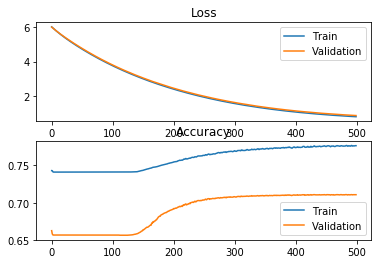

In [79]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [ ]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
history.history['val_accuracy']

In [ ]:
len(tst_y) * 14 * 14

In [ ]:
np.sum(tst_y)

In [ ]:
1-45159/134064

In [19]:
model.save("../models/FES Team/prelim_CNN_epoch500.h5")

In [20]:
# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])


In [24]:
input_img = model.inputs[0]

In [68]:
from keras import backend as K

layer_name = 'conv2d_3'
filter_index = 20  # can be any integer from 0 to 511, as there are 512 filters in that layer

# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, :, :, filter_index])

# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])

In [69]:
# we start from a gray image with some noise
input_img_data = np.random.random((1, 3, 16, 16)) * 20 + 128.
# run gradient ascent for 20 steps
for i in range(20):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * 1

In [70]:
from scipy.misc import imsave

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

img = input_img_data[0]
img = deprocess_image(img)

In [71]:
imsave('%s_filter_%d.png' % (layer_name, filter_index), img)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


In [21]:
layer_dict

{'conv2d_3': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x26d207bb5f8>,
 'conv2d_4': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x26d207bbb00>,
 'conv2d_5': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x26d207bbfd0>,
 'reshape_1': <tensorflow.python.keras.layers.core.Reshape at 0x26d207bd470>}

In [35]:
tr_y[1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.],
       [1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [44]:
predictions = model(tr_xend[1:2]).numpy().round()
predictions.reshape(14,14)

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.],
        [1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.]]],
      dtype=float32)

In [49]:
predictions = np.squeeze(predictions)

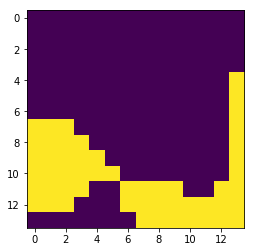

In [50]:
fig, ax = plt.subplots()
ax.imshow(predictions, interpolation='nearest')

numrows, numcols = predictions.shape

def format_coord(x, y):
    col = int(x + 0.5)
    row = int(y + 0.5)
    if col >= 0 and col < numcols and row >= 0 and row < numrows:
        z = X[row, col]
        return 'x=%1.4f, y=%1.4f, z=%1.4f' % (x, y, z)
    else:
        return 'x=%1.4f, y=%1.4f' % (x, y)

ax.format_coord = format_coord
plt.show()

In [51]:
from sklearn.metrics import classification_report

In [54]:
tr_y[1].round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.],
       [1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [60]:
predictions = model(tst_xend).numpy().round()

In [61]:
predictions.shape

(684, 14, 14)

In [63]:
tst_y.reshape(684,196)

array([[0., 0., 0., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [65]:
print(classification_report(predictions.reshape(196,684), tst_y.reshape(196,684).round()))

              precision    recall  f1-score   support

           0       0.32      0.78      0.46        32
           1       0.33      0.77      0.46        31
           2       0.30      0.81      0.44        27
           3       0.31      0.85      0.46        27
           4       0.32      0.86      0.47        28
           5       0.34      0.89      0.49        28
           6       0.34      0.91      0.50        32
           7       0.37      0.88      0.52        32
           8       0.38      0.90      0.53        30
           9       0.40      0.91      0.56        33
          10       0.39      0.91      0.55        32
          11       0.42      0.91      0.57        32
          12       0.38      0.94      0.55        32
          13       0.40      0.85      0.54        33
          14       0.38      0.84      0.52        31
          15       0.30      0.78      0.43        27
          16       0.29      0.78      0.42        27
          17       0.30    

In [66]:
predictions[0]

array([[0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [67]:
tst_y[0]

array([[0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.]])

In [74]:
from vis.visualization import visualize_activation
from vis.utils import utils

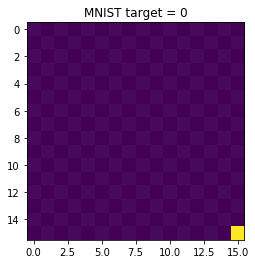

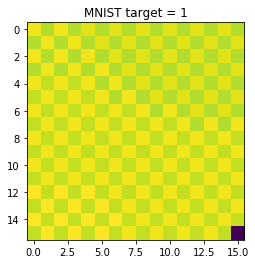

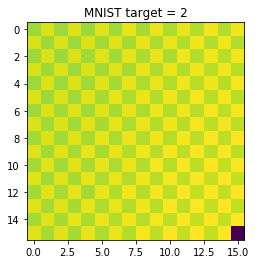

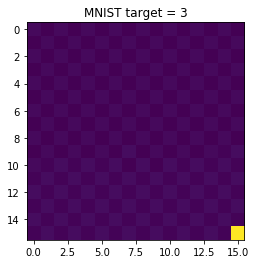

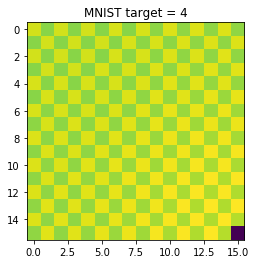

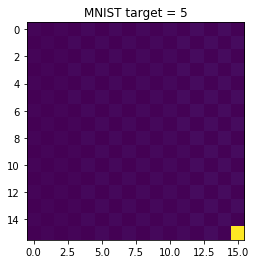

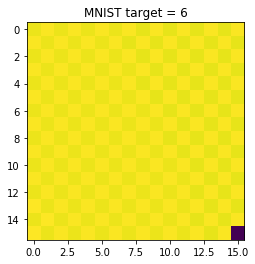

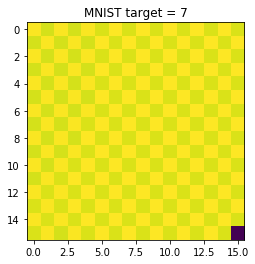

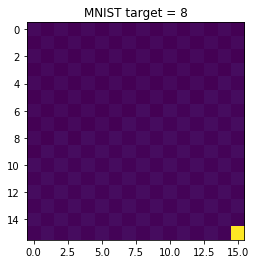

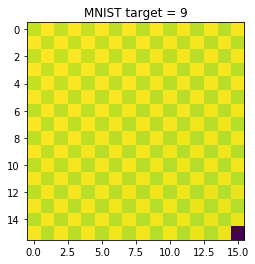

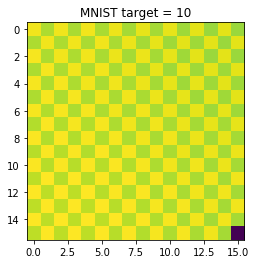

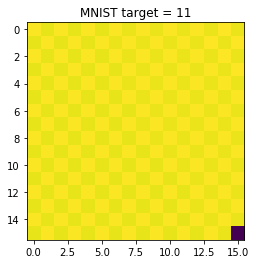

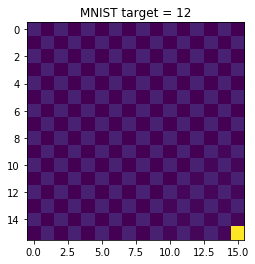

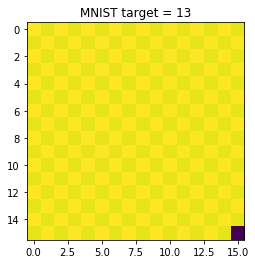

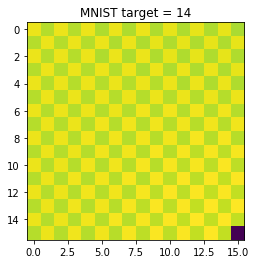

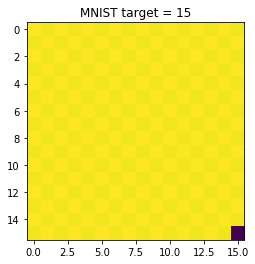

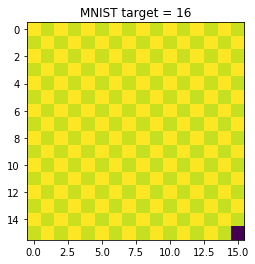

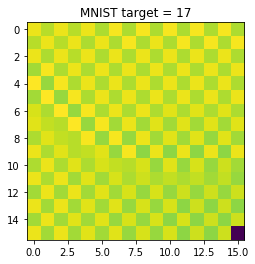

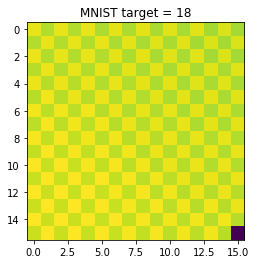

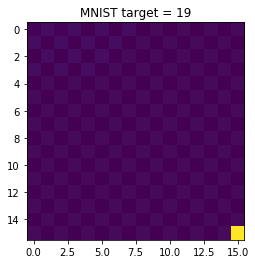

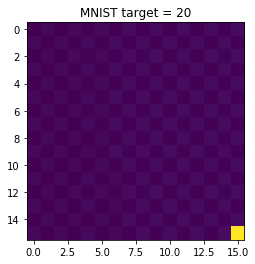

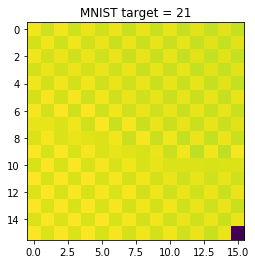

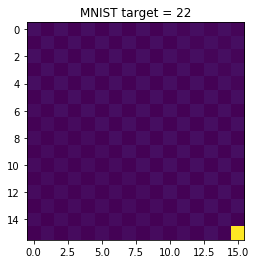

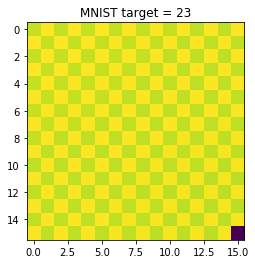

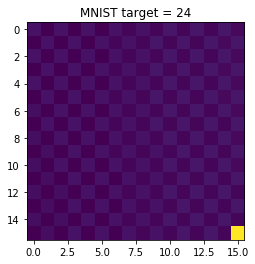

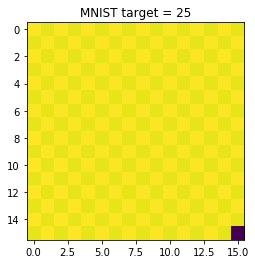

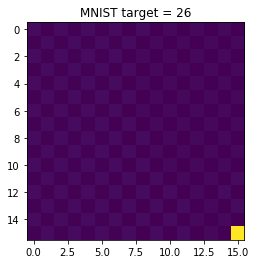

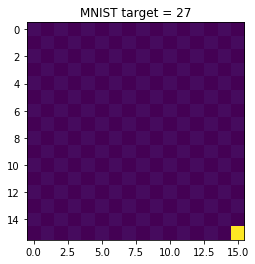

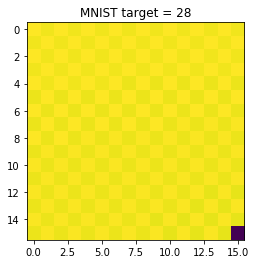

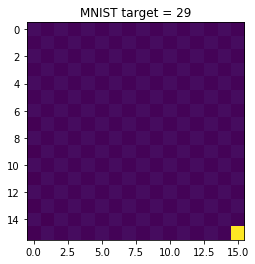

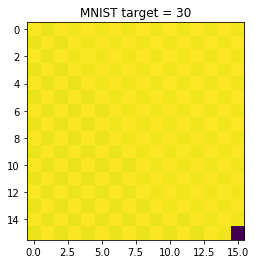

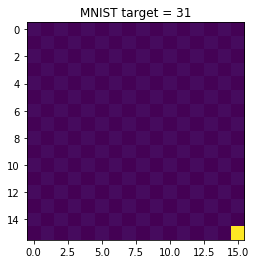

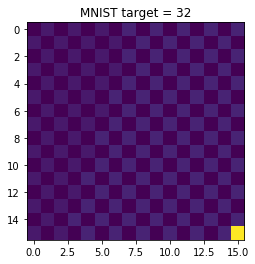

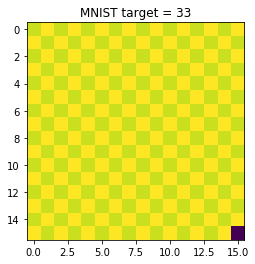

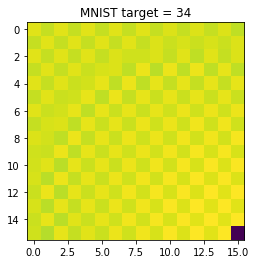

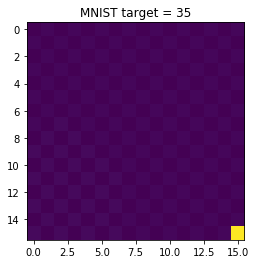

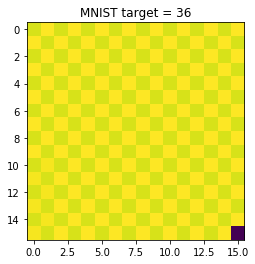

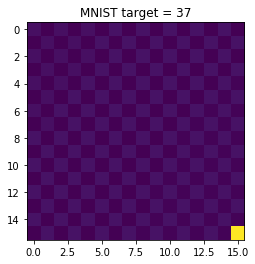

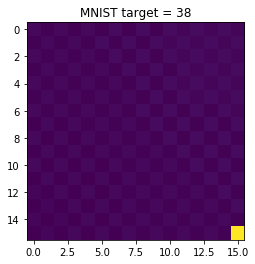

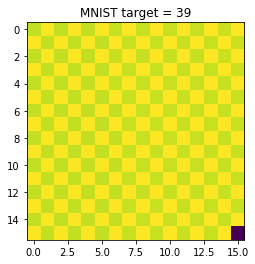

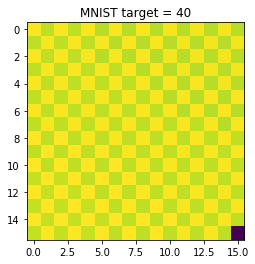

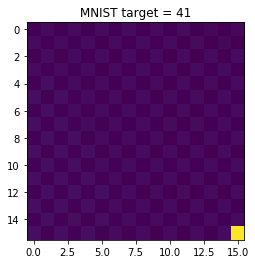

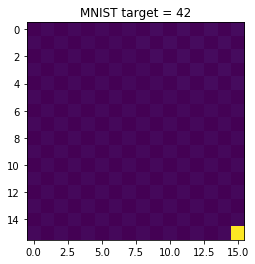

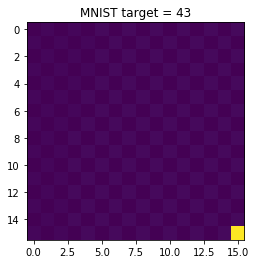

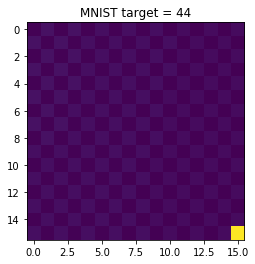

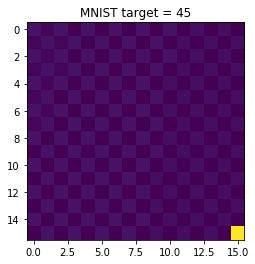

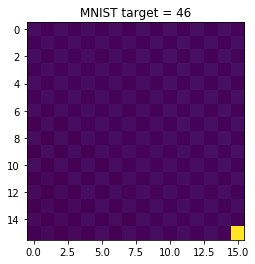

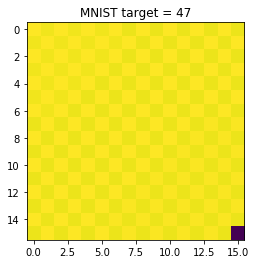

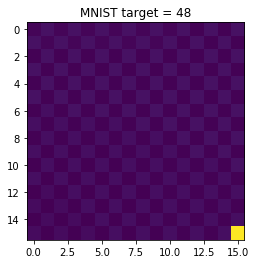

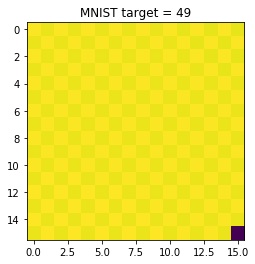

In [78]:
numstovis = range(0,50)
for number_to_visualize in numstovis:
  visualization = visualize_activation(model, 1, filter_indices=number_to_visualize)
  plt.imshow(visualization[..., 0])
  plt.title(f'MNIST target = {number_to_visualize}')
  plt.show()

In [82]:
tst_xend[1].shape

(16, 16, 16)